# Step 2: Non-linear Convection

Now we're going to implement non-linear convection using the same methods as in step 1. The 1D convection equation is:

$$
\frac{\partial u}{\partial t} + u \frac{\partial u}{\partial x} = 0
$$

Instead of a constant factor $c$ multiplying the second term, now we have the solution $u$ multiplying it. Thus, the second term of the equation is now *non-linear*. We're going to use the same discretization as in Step1 - forward difference in time and backward difference in space. Here is the discretized equation:

$$
\frac{u_i^{n+1}-u_i^n}{\Delta t} + u_i^n \frac{u_i^n - u_{i-1}^n}{\Delta x} = 0 
$$

Solving for the only unknown term, $u_i^{n+1}, yields:

$$
u_i^{n+1} = u_i^n - u_i^n \frac{\Delta t}{\Delta x}(u_i^n - u_{i-1}^n)
$$

As before, we will declare some variables that determine the discretization in space and time. Then, we create the initial condition $u_0$ by initializing the array for the solution using $u = 2$ @ $0.5 \leq x \leq 1$ and $u = 1$ everywhere else in $(0,2)$(i.e, a hat function)


## Imports

In [1]:
import numpy as np
from matplotlib import pyplot
%matplotlib inline

## Variables and Initial Conditions

In [2]:
nx = 41            # Number of grid points
dx = 2 / (nx - 1)  # Distance between any pair of grid points
nt = 20            # Number of time steps
dt = 0.025         # Time step size


u = np.ones(nx) # Initialize velocity vector (u) with every value equal to 1
u[int(.5 / dx):int(1 / dx + 1)] = 2 # Set u = 2 between 0.5 and 1

un = np.ones(nx)

## Discretization

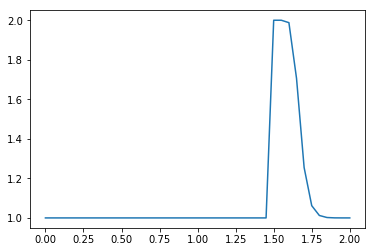

In [3]:
for n in range(nt):
    un = u.copy()
    for i in range(1, nx):
        u[i] = un[i] - un[i] * dt / dx * (un[i] - un[i - 1])
        
pyplot.plot(np.linspace(0, 2, nx), u)